In [265]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

In [266]:
coin_list = ['BTC','ETH','ADA','SOL','DOT']

df_Returns = pd.DataFrame()
df_Prices = pd.DataFrame()

for i in coin_list:
    coin_name = i
    %run ./code_1.ipynb
    df_Returns = pd.concat([df_Returns, Returns], axis=1)
    df_Prices = pd.concat([df_Prices,T_day_OP], axis=1)

df_Returns.columns = coin_list
df_Prices.columns = coin_list

print(df_Returns)
print(df_Prices)

         BTC       ETH       ADA       SOL       DOT
0   0.167712  0.887969  1.072365  1.283703  0.996624
1   0.348572  0.058805  2.790230  2.446564  0.991082
2   0.184274  0.171754 -0.064765  0.275033 -0.046525
3  -0.088653  0.437387  0.097315  1.191040 -0.029412
4  -0.383461 -0.190274  0.164819 -0.423154 -0.445979
5  -0.037259 -0.200109 -0.212069  0.035387 -0.303043
6   0.259031  0.167981 -0.018713 -0.028211  0.039448
7   0.178641  0.262888  1.079027  2.221345  0.413138
8  -0.119167 -0.170093 -0.254421  0.248846 -0.130740
9   0.285015  0.306078 -0.133038  0.211789  0.336984
10 -0.057216  0.036920 -0.184639  0.007698 -0.131634
11 -0.176458 -0.191306 -0.122739 -0.249576 -0.252037
12 -0.205896 -0.308888 -0.249275 -0.478921 -0.363986
13 -0.012306  0.005463 -0.191698 -0.109193 -0.065206
14  0.059150  0.137244  0.234555  0.222909  0.186243
15 -0.152197 -0.141816 -0.295271 -0.235347 -0.242155
16 -0.281969 -0.435813 -0.224452 -0.514130 -0.403480
         BTC      ETH     ADA      SOL     DOT

In [267]:
#assuming we need to buy and sell only one unit

Long_list_buying = df_Returns.idxmax(axis=1).to_numpy()
Long_list_selling = np.delete(Long_list_buying,-1)


Short_list_selling = df_Returns.idxmin(axis=1).to_numpy()
Short_list_buying = np.delete(Short_list_selling,-1)

#Long_list

In [268]:
# Set the initial capital
init_capital = 1000000

capital_checkpoints = np.array([init_capital])
for index, row in df_Prices.iterrows():
    
    init_capital = init_capital - row[Long_list_buying[index]]
    if(index>0):
        init_capital = init_capital - row[Short_list_buying[index-1]]

    init_capital = init_capital + row[Short_list_selling[index]]
    if(index>0):
        init_capital = init_capital + row[Long_list_selling[index-1]]

    capital_checkpoints = np.append(capital_checkpoints,[init_capital])

final_capital = init_capital
print(init_capital)
print(capital_checkpoints)

1022638.2029999999
[1000000.     1034313.602   989594.313   987736.239  1041316.511
 1005701.405  1005668.836   963485.956  1057252.236  1015714.872
 1015868.052  1011456.702  1015191.606   977359.332  1012372.1688
 1062811.3108 1021401.4704 1022638.203 ]


In [269]:
# only BTC Portfolio
init_capital_BTC = 1000000
capital_checkpoints_BTC = np.array([])

for index, row in df_Prices.iterrows():
    if(index>0):
        init_capital_BTC = init_capital_BTC + row['BTC']
    
    capital_checkpoints_BTC = np.append(capital_checkpoints_BTC,[init_capital_BTC])

    init_capital_BTC = init_capital_BTC - row['BTC']

capital_checkpoints_BTC = np.append(capital_checkpoints_BTC,[init_capital_BTC])

print(init_capital_BTC)
print(capital_checkpoints_BTC)

965682.1799999999
[1000000.   1011873.57 1024463.72 1019263.76 1001344.77 1001583.59
 1007914.01 1012675.49 1007221.61 1027574.09 1023521.73 1012811.84
 1003590.62 1003397.14 1012738.59 1004276.4   988153.77  965682.18]


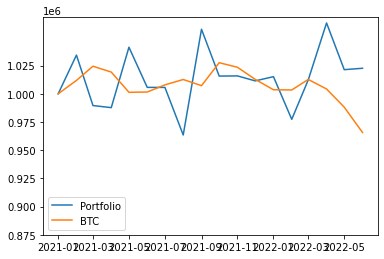

In [270]:
x = start_dates.to_numpy()

plt.plot(x,capital_checkpoints, label = "Portfolio")
plt.plot(x,capital_checkpoints_BTC, label = "BTC")
plt.yticks([875000,900000,925000,950000,975000,1000000,1025000])
# Show plot
plt.legend()
plt.show()

Strategy can be improved by not going long and short on single units of the script. number of units should be decided by price ratio.
Though strategy has better returns than BTC but has less sharp Ratio compared to BTC.